# Navel Corona Virus

- Day level information on 2019-nCoV affected cases.
- 2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC
- This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 22 Jan 2020.
> Dataset link: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset


### Data Dictionary

1. Sno: Serial number
2. Province/State: Province or State of observation
3. Country: Country of observation
4. Last Update: Date of observation
5. Confirmed: Number of confirmed cases
6. Deaths: Number of deaths
7. Recovered: Number of recovered cases

## Step : Import libraries

In [95]:
import numpy as np
import pandas as pd

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Import seaborn library
import seaborn as sns

# To see the plots in the notebook
%matplotlib inline

## Step : Reading/Importing the Data

In [2]:
raw_data = pd.read_csv("data/2019_nCoV_data.csv")
raw_data.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


## Step : Understanding/Inspecting the data

In [3]:
# See few data records
raw_data.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [4]:
# Shape of the data
raw_data.shape

(434, 7)

Data contains 434 rows and 7 columns

In [5]:
# Information about each columns
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
Sno               434 non-null int64
Province/State    349 non-null object
Country           434 non-null object
Last Update       434 non-null object
Confirmed         434 non-null float64
Deaths            434 non-null float64
Recovered         434 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 18.7+ KB


We have 3 float, 1 int and 3 object columns.

In [6]:
# Generates descriptive statistics
raw_data.describe()

,Sno,Confirmed,Deaths,Recovered
count,434.000000,434.000000,434.000000,434.000000
mean,217.500000,80.762673,1.847926,1.525346
std,125.429263,424.706068,15.302792,9.038054
min,1.000000,0.000000,0.000000,0.000000
25%,109.250000,2.000000,0.000000,0.000000
50%,217.500000,7.000000,0.000000,0.000000
75%,325.750000,36.000000,0.000000,0.000000
max,434.000000,5806.000000,204.000000,116.000000


In [7]:
raw_data[raw_data['Confirmed'] != 0].count()

Sno               415
Province/State    336
Country           415
Last Update       415
Confirmed         415
Deaths            415
Recovered         415
dtype: int64

## Step : Data cleaning and preparation

#### Checking for Missing Values and Fix/Drop them

In [8]:
# Checking missing values (column-wise)
raw_data.isnull().sum()

Sno                0
Province/State    85
Country            0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [9]:
# Checking the percentage of missing values
round(100*(raw_data.isnull().sum()/len(raw_data.index)), 2)

Sno                0.00
Province/State    19.59
Country            0.00
Last Update        0.00
Confirmed          0.00
Deaths             0.00
Recovered          0.00
dtype: float64

We have 19.59% missing data in Province/State.

Now we can either drop it or fix it. Since it is of String type and we can't replace the null values with any mathematical formula, so it's better to drop the rows with missing Province/State.

In [10]:
# Dropping the rows with missing Province/State.
raw_data.dropna(inplace=True)

In [11]:
# Checking missing values (column-wise)
raw_data.isnull().sum()

Sno               0
Province/State    0
Country           0
Last Update       0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

Now we don't have any missing values. So we can proceed with the next step.

In [12]:
raw_data["LastUpdated"] = pd.to_datetime(raw_data['Last Update'])
raw_data.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,LastUpdated
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0,2020-01-22 12:00:00
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0,2020-01-22 12:00:00
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0,2020-01-22 12:00:00
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0,2020-01-22 12:00:00
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0,2020-01-22 12:00:00


In [134]:
raw_data['date'] = pd.DatetimeIndex(raw_data['LastUpdated']).date

raw_data['year'] = pd.DatetimeIndex(raw_data['LastUpdated']).year

raw_data['month'] = pd.DatetimeIndex(raw_data['LastUpdated']).month

raw_data['day'] = pd.DatetimeIndex(raw_data['LastUpdated']).day

raw_data['time'] = pd.DatetimeIndex(raw_data['LastUpdated']).time

raw_data['dayofweek'] = pd.DatetimeIndex(raw_data['LastUpdated']).dayofweek

raw_data['day_name'] = pd.DatetimeIndex(raw_data['LastUpdated']).day_name()

raw_data['month_name'] = pd.DatetimeIndex(raw_data['LastUpdated']).month_name()
raw_data.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,LastUpdated,year,month,day,time,dayofweek,day_name,month_name,date
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0,2020-01-22 12:00:00,2020,1,22,12:00:00,2,Wednesday,January,2020-01-22
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0,2020-01-22 12:00:00,2020,1,22,12:00:00,2,Wednesday,January,2020-01-22
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0,2020-01-22 12:00:00,2020,1,22,12:00:00,2,Wednesday,January,2020-01-22
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0,2020-01-22 12:00:00,2020,1,22,12:00:00,2,Wednesday,January,2020-01-22
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0,2020-01-22 12:00:00,2020,1,22,12:00:00,2,Wednesday,January,2020-01-22


### Question 1 : Severity of virus?

Basically its an ratio between Confirmed cases and Deaths.

In [16]:
severity = (raw_data['Deaths'].sum() / raw_data['Confirmed'].sum())*100
severity

2.307847256194066

The death percentage among the Confirmed cases is only `2.3%`. The severity level of Corona virus is very low.

### Question 2 : Which top 5 country has most number of Confirmed cases?

In [50]:
top_country = raw_data.groupby('Country').sum()
top_country.head()

,Sno,Confirmed,Deaths,Recovered,year,month,day,dayofweek
Country,,,,,,,,
Australia,3560,26.0,0.0,2.0,20200,10,287,17
Canada,2681,10.0,0.0,0.0,16160,8,227,18
China,598,549.0,0.0,0.0,68680,34,748,68
Germany,1388,13.0,0.0,0.0,8080,4,114,6
Hong Kong,1798,55.0,0.0,0.0,16160,8,212,24


In [75]:
top_country.sort_values(by='Confirmed', ascending=False).head(10)

,Sno,Confirmed,Deaths,Recovered,year,month,day,dayofweek
Country,,,,,,,,
Mainland China,52309,33986.0,802.0,636.0,490860,243,6442,728
China,598,549.0,0.0,0.0,68680,34,748,68
Hong Kong,1798,55.0,0.0,0.0,16160,8,212,24
Taiwan,1830,41.0,0.0,0.0,16160,8,212,24
Macau,1825,39.0,0.0,0.0,16160,8,212,24
US,6748,32.0,0.0,0.0,52520,26,703,71
Australia,3560,26.0,0.0,2.0,20200,10,287,17
Germany,1388,13.0,0.0,0.0,8080,4,114,6
Canada,2681,10.0,0.0,0.0,16160,8,227,18


`Mainland China` has the highest number of `Confirmed` cases.

Let's visualize this data for more clarity.

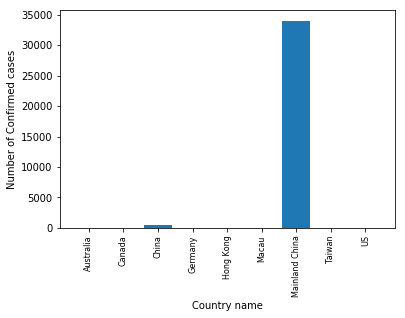

In [54]:
countries = [country for country, df in raw_data.groupby('Country')]

plt.bar(countries, top_country['Confirmed'])
plt.xticks(countries, rotation='vertical', size=8)
plt.xlabel('Country name')
plt.ylabel('Number of Confirmed cases')
plt.show()

As shown in the graph, `Mainland China` has the highest number of Confirmed cases.

### Question 3 : Which top 5 states has most number of Confirmed cases in Mainland China? 

In [78]:
mainland_china = raw_data.loc[raw_data['Country'] == 'Mainland China']

top_states = mainland_china.groupby('Province/State').sum()
top_states.head()

,Sno,Confirmed,Deaths,Recovered,year,month,day,dayofweek
Province/State,,,,,,,,
Anhui,1641,849.0,0.0,5.0,16160,8,212,24
Beijing,1659,580.0,4.0,20.0,16160,8,212,24
Chongqing,1634,871.0,0.0,3.0,16160,8,212,24
Fujian,1693,411.0,1.0,0.0,16160,8,212,24
Gansu,1767,123.0,0.0,0.0,16160,8,212,24


In [79]:
top_states.sort_values(by='Confirmed', ascending=False).head(10)

,Sno,Confirmed,Deaths,Recovered,year,month,day,dayofweek
Province/State,,,,,,,,
Hubei,1610,20128.0,760.0,478.0,16160,8,212,24
Zhejiang,1640,1736.0,0.0,20.0,16160,8,212,24
Guangdong,1615,1425.0,0.0,34.0,16160,8,212,24
Henan,1639,1229.0,9.0,6.0,16160,8,212,24
Hunan,1643,1132.0,0.0,2.0,16160,8,212,24
Chongqing,1634,871.0,0.0,3.0,16160,8,212,24
Anhui,1641,849.0,0.0,5.0,16160,8,212,24
Jiangxi,1674,692.0,0.0,16.0,16160,8,212,24
Shandong,1681,654.0,1.0,3.0,16160,8,212,24


`Hubei` has the highest number of Confirmed cases.

Let's visualize this data for more clarity

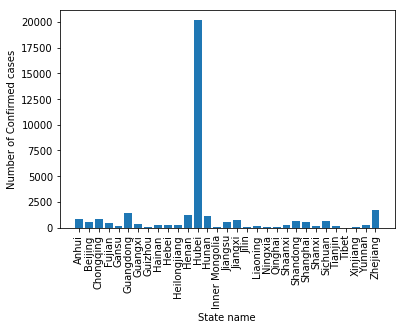

In [93]:
states = [state for state, df in mainland_china.groupby('Province/State')]

plt.bar(states, top_states['Confirmed'])
plt.xticks(states, rotation='vertical')
plt.xlabel('State name')
plt.ylabel('Number of Confirmed cases')
plt.show()

As shown in the graph, `Hubei` has the highest number of Confirmed cases.

### Question 4 : Spread of coronavirus?

In [115]:
# Create a pivot table on 'flights' dataset
fp = raw_data.pivot_table(index = 'Province/State', columns = 'Country', values = 'Confirmed')

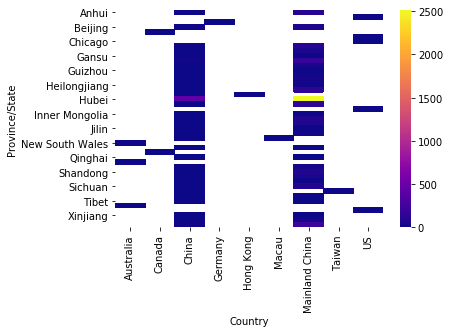

In [114]:
# Plot the heatmap for the above pivot table
sns.heatmap(fp, cmap = 'plasma')

Mainly, The virus is spread across the `Mainland China` and `China`.

### Question 5 : Trend of the Spread of the virus.

In [135]:
daily_confirmed = raw_data.groupby('date').sum()
daily_confirmed

,Sno,Confirmed,Deaths,Recovered,year,month,day,dayofweek
date,,,,,,,,
2020-01-22,630,550.0,0.0,0.0,70700,35,770,70
2020-01-23,1960,645.0,18.0,30.0,70700,35,805,105
2020-01-24,3535,925.0,26.0,36.0,70700,35,840,140
2020-01-25,4970,1991.0,56.0,49.0,70700,35,875,175
2020-01-26,7134,2761.0,80.0,51.0,76760,38,988,228
2020-01-27,9717,4440.0,107.0,60.0,82820,41,1107,0
2020-01-28,12163,6009.0,132.0,104.0,84840,42,1176,42
2020-01-29,15082,7722.0,170.0,127.0,88880,44,1276,88
2020-01-30,17546,9708.0,213.0,181.0,88880,44,1320,132


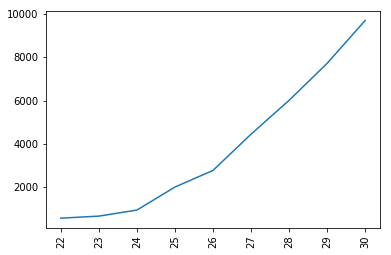

In [157]:
dates = [date for date, df in raw_data.groupby('date')]
dates = pd.DatetimeIndex(dates).day

plt.plot(dates, daily_confirmed['Confirmed'])

plt.xticks(dates, rotation='vertical')
plt.show()

As shown in the graph, there is a sudden inclination after 26 Jan 2020.

### Question : Health care better? Statewise

### Question: Focus on outliers.